# TCP数据格式
直接传的，什么都没管，但是这样肯定有问题
我用python的recv一次最多接受一个tcp包，大小1444B作为测试。。。。。。

# 采集数据格式

AD采集到24位数据。在网络中以32位数据形式，小端形式发送。高8位全0，低24位为真实数据。

# 测试步骤
1. 运行以下每一个代码块
2. 设置函数发生器对应参数
3. 在def.hpp文件中配置参数
4. 将硬件软件程序烧到FPGA开发板，等待FPGA向电脑上的socket发送数据
5. 得到数据，展示波形。对比得到的波形的频率

In [ ]:
# -*- coding:utf-8 -*-
import socket
import traceback
import struct
from typing import *

import matplotlib_inline
import matplotlib.pyplot as plt

## get_data  (host:str,port:int,continuous_disp:bool)->Tuple
调用此函数完成测试

`host`: 本地服务器ip地址

`port`: 本地服务器端口

`continuous_disp`: 没有用

`SAMPLE_DATA`: 服务器收集数据个数

返回数据

In [ ]:
SAMPLE_DATA=849288
def get_data(host:str,port:int,continuous_disp=False)->Tuple[Optional[List[int]],bytes]:
    address=(host,port)

    s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    s.setsockopt(socket.IPPROTO_TCP,socket.TCP_MAXSEG,1460)
    s.bind(address)
    s.listen(1)

    print("Waiting for connections...")
    try:
        client_connection, client_address = s.accept()
    except KeyboardInterrupt:
        raise
    except:
        traceback.print_exc()

    try:
        print("Got connection from", client_connection.getpeername())
        raw_buf=b''
        raw_data:List[int]=[]
        data:List[int]=[]
        while True:
            buf = client_connection.recv(SAMPLE_DATA*4)
            if len(buf) == 0:
                continue
            else:
                i=0
                while i*4+4<=len(buf):
                    t=struct.unpack("<I",buf[i*4:i*4+3]+(b'\x00' if buf[i*4+2]<128 else b'\xff'))[0]
                    t=t|-(t&0x80000000)
                    data.append(t)
                    i=i+1
                s.close()
                return (raw_buf,raw_data,data)        
    except (KeyboardInterrupt, SystemError):
        raise
    except:
        traceback.print_exc()

## 10KHz,2.5Vpp

In [ ]:
raw_buf,raw_data,data=get_data("192.168.0.10",5001)
plt.plot(data)

## 40KHz,2.5Vpp

In [ ]:
raw_buf,raw_data,data=get_data("192.168.0.10",5001)
plt.plot(data)

## 80KHz,2.5Vpp

In [ ]:
raw_buf,raw_data,data=get_data("192.168.0.10",5001)
plt.plot(data[0:100])

## 120KHz,2.5Vpp

In [ ]:
raw_buf,raw_data,data=get_data("192.168.0.10",5001)
plt.plot(data[200:280])

## 160KHz,2.5Vpp

In [ ]:
raw_buf,raw_data,data=get_data("192.168.0.10",5001)
plt.plot(data[200:250])

## 200KHz,2.5Vpp

In [ ]:
raw_buf,raw_data,data=get_data("192.168.0.10",5001)
plt.plot(data[100:130])

## 240KHz,2.5Vpp

In [ ]:
raw_buf,raw_data,data=get_data("192.168.0.10",5001)
plt.plot(data[100:120])

## 280KHz,2.5Vpp

In [ ]:
raw_buf,raw_data,data=get_data("192.168.0.10",5001)
plt.plot(data[100:120])

## TEST

In [1]:
# -*- coding:utf-8 -*-
import socket
import traceback
import struct
from typing import *

import matplotlib_inline
import matplotlib.pyplot as plt
SAMPLE_DATA=2000000
def get_data(s)->Tuple[Optional[List[int]],bytes]:
    try:
        raw_buf=b''
        raw_data:List[int]=[]
        data:List[int]=[]
        while True:
            buf = client_connection.recv(SAMPLE_DATA*4)
            if len(buf) == 0:
                continue
            else:
                raw_buf=raw_buf+buf
                if len(raw_buf)>SAMPLE_DATA*4 and len(raw_buf)%4==0:
                    break
        i=0
        while i*4+4<=len(raw_buf):
            t=struct.unpack("<I",raw_buf[i*4:i*4+3]+(b'\x00' if raw_buf[i*4+2]<128 else b'\xff'))[0]
            t=t|-(t&0x80000000)
            data.append(t)
            i=i+1
        return (raw_buf,raw_data,data)        
    except (KeyboardInterrupt, SystemError):
        raise
    except:
        traceback.print_exc()

In [8]:
address=("192.168.0.144",5011)

s=socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s.setsockopt(socket.IPPROTO_TCP,socket.TCP_MAXSEG,1460)
s.bind(address)
s.listen(1)
print("Waiting for connections...")
try:
    client_connection, client_address = s.accept()
except KeyboardInterrupt:
    raise
except:
    traceback.print_exc()
datas=[]
for i in range(20):
    print("getting data:%d",i)
    raw_buf,raw_data,data=get_data(s)
    datas=datas+data
s.close()

Waiting for connections...
getting data:%d 0
getting data:%d 1
getting data:%d 2
getting data:%d 3
getting data:%d 4
getting data:%d 5
getting data:%d 6
getting data:%d 7
getting data:%d 8
getting data:%d 9
getting data:%d 10
getting data:%d 11
getting data:%d 12
getting data:%d 13
getting data:%d 14
getting data:%d 15
getting data:%d 16
getting data:%d 17
getting data:%d 18
getting data:%d 19


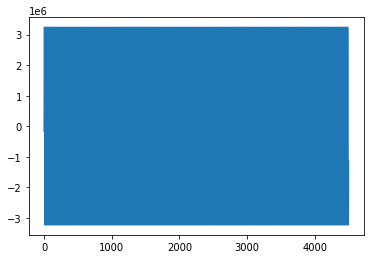

In [10]:
i=36
plt.plot(datas[500:5000])

In [9]:
import scipy.io
scipy.io.savemat("/home/dn/datas.mat",dict([("datas",datas)]))

In [11]:
import scipy.io
a=scipy.io.loadmat("/home/dn/datas.mat")
datas=a["datas"]

In [6]:
for i in range(len(datas)-1):
    if abs(datas[i]-datas[i+1]>1000000):
        print("error")

error
error
error
error
error
error
error
